In [1]:
import fitness
import glouton
import random_schedule
import local_search_descente
import simulated_annealing
import matplotlib.pyplot as plt
import time
import random

# Fonction d'affichage pour la planification
import matplotlib.pyplot as plt
import numpy as np
import AGSimple
import AGlocalsearch

num_teams = 12
tableau_recap = []

In [2]:
# Fonction d'affichage pour la planification
def print_schedule(schedule, filename='schedule.png'):
    num_weeks = len(schedule)
    num_periods = len(schedule[0]) if num_weeks > 0 else 0

    # Créer une matrice pour représenter le tableau
    schedule_matrix = np.full((num_weeks, num_periods), '', dtype=object)

    # Remplir la matrice avec les équipes ou une indication de cellule vide
    for week in range(num_weeks):
        for period in range(num_periods):
            match = schedule[week][period]
            if match:
                schedule_matrix[week, period] = f"{match[0]} vs {match[1]}"
            else:
                schedule_matrix[week, period] = "(vide)"

    # Créer une figure et des axes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Afficher le tableau avec Matplotlib
    ax.axis('tight')
    ax.axis('off')

    # Créer un tableau à partir de la matrice
    table = ax.table(cellText=schedule_matrix,
                     colLabels=[f"Période {i+1}" for i in range(num_periods)],
                     rowLabels=[f"Semaine {i+1}" for i in range(num_weeks)],
                     cellLoc='center',
                     loc='center')

    # Personnaliser l'apparence du tableau
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)  # Ajustez la taille des cellules si nécessaire

    # Sauvegarder l'image du tableau
    plt.savefig(filename, bbox_inches='tight')
    plt.show()  # Afficher le tableau

In [3]:
def mean_score(algo='glouton', num_teams=12, it=200):
    sum_fitness = 0  # Pour stocker la somme des scores de fitness
    total_time = 0   # Pour stocker la somme des temps d'exécution
    max_fitness = 0  # Pour stocker le score de fitness maximal
    min_fitness = 1000000  # Pour stocker le score de fitness minimal
    best_params = {} # Pour stocker les meilleurs paramètres

    for i in range(it):
        start_time = time.time()  # Démarre le chronomètre pour l'itération
        
        # Random temperature and cooling rate

        initial_temp = random.uniform(50, 300)
        cooling_rate = random.uniform(0.60, 0.99)

        # Choisir la méthode de planification
        if algo == 'glouton':
            schedule = glouton.round_robin_schedule(num_teams)
        elif algo == 'random':
            schedule = random_schedule.random_round_robin_schedule(num_teams)
        elif algo == 'local_search_random':
            schedule = local_search_descente.local_search(random_schedule.random_round_robin_schedule(num_teams), num_teams, max_iterations=10000, verbose=False)[0]
        elif algo == 'local_search_glouton':
            schedule = local_search_descente.local_search(glouton.round_robin_schedule(num_teams), num_teams, max_iterations=10000, verbose=False)[0]
        elif algo == 'simulated_annealing_random':
            schedule = simulated_annealing.simulated_annealing(random_schedule.random_round_robin_schedule(num_teams), num_teams, max_iterations=20000, verbose=False, initial_temp=initial_temp, cooling_rate=cooling_rate)[0]
        elif algo == 'simulated_annealing_glouton':
            schedule = simulated_annealing.simulated_annealing(glouton.round_robin_schedule(num_teams), num_teams, max_iterations=20000, verbose=False, initial_temp=initial_temp, cooling_rate=cooling_rate)[0]
        elif algo == 'genetic_algorithm_simple':
            schedule = AGSimple.genetic_algorithm(30, num_teams, 300)[0]
        elif algo == 'genetic_algorithm_local_search':
            schedule = AGlocalsearch.genetic_algorithm(30, num_teams, 300)[0]
            print('iteration : ', str(i) , " terminée avec un score de : ", fitness.evaluate_schedule(schedule, 12, False))
        elif algo == 'tabou':
            schedule = tabou.tabou_search(random_schedule.random_round_robin_schedule(num_teams), num_teams, max_iterations=30000, verbose=False)[0]
        # Calculer le score de fitness
        score = fitness.evaluate_schedule(schedule, 12, False)
        sum_fitness += score  # Ajoute le score de fitness à la somme totale
        
        if score < min_fitness:
            min_fitness = score
            best_params = {'initial_temp': initial_temp, 'cooling_rate': cooling_rate}
        if score > max_fitness:
            max_fitness = score
        end_time = time.time()  # Arrête le chronomètre
        total_time += (end_time - start_time)  # Ajoute le temps écoulé à la somme totale

    # Moyenne des scores et des temps
    mean_fitness = sum_fitness / it
    mean_time = total_time / it

    print("Calcul de la moyenne pour " + algo + " sur " + str(it) + " itérations avec " + str(num_teams) + " équipes")
    print(f"Temps moyen d'exécution pour {algo}: {mean_time:.5f} secondes")
    print(f"Score moyen de fitness pour {algo}: {mean_fitness:.5f}")
    print(f"Score maximal de fitness pour {algo}: {max_fitness:.5f}")
    print(f"Score minimal de fitness pour {algo}: {min_fitness:.5f}")
    if algo == 'simulated_annealing_random' or algo == 'simulated_annealing_glouton':
        print(f"Meilleurs paramètres - Température initiale: {best_params['initial_temp']:.2f}, Taux de refroidissement: {best_params['cooling_rate']:.2f}")
    print("\n")

    return algo, mean_fitness, max_fitness, min_fitness, mean_time



Calcul de la moyenne pour glouton sur 200 itérations avec 12 équipes
Temps moyen d'exécution pour glouton: 0.00009 secondes
Score moyen de fitness pour glouton: 960.00000
Score maximal de fitness pour glouton: 960.00000
Score minimal de fitness pour glouton: 960.00000


Exemple de planification pour un glouton : Score de la planification (pénalités totales): 960


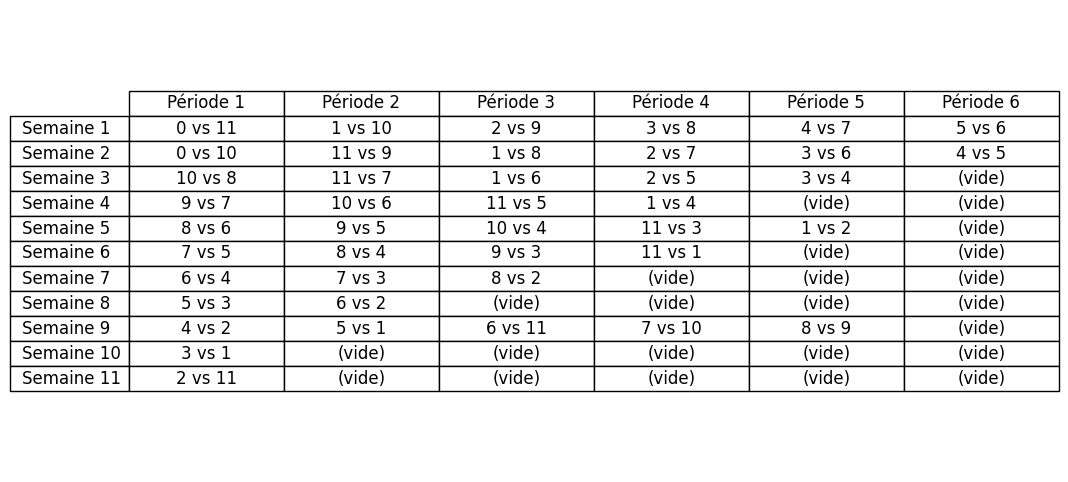

In [4]:

    num_teams = 12
    # glouton 
    scheduleGlouton = glouton.round_robin_schedule(num_teams)
    penaltyGlouton = fitness.evaluate_schedule(scheduleGlouton, num_teams, False)
    print("\n")
    # ajout du mean score dans le tableau
    mean_score('glouton', it=200)
    print(f"Exemple de planification pour un glouton : Score de la planification (pénalités totales): {penaltyGlouton}")
    print_schedule(scheduleGlouton)




Calcul de la moyenne pour random sur 200 itérations avec 12 équipes
Temps moyen d'exécution pour random: 0.00011 secondes
Score moyen de fitness pour random: 1113.85000
Score maximal de fitness pour random: 1325.00000
Score minimal de fitness pour random: 875.00000


Exemple de planification pour un random : Score de la planification (pénalités totales): 1240


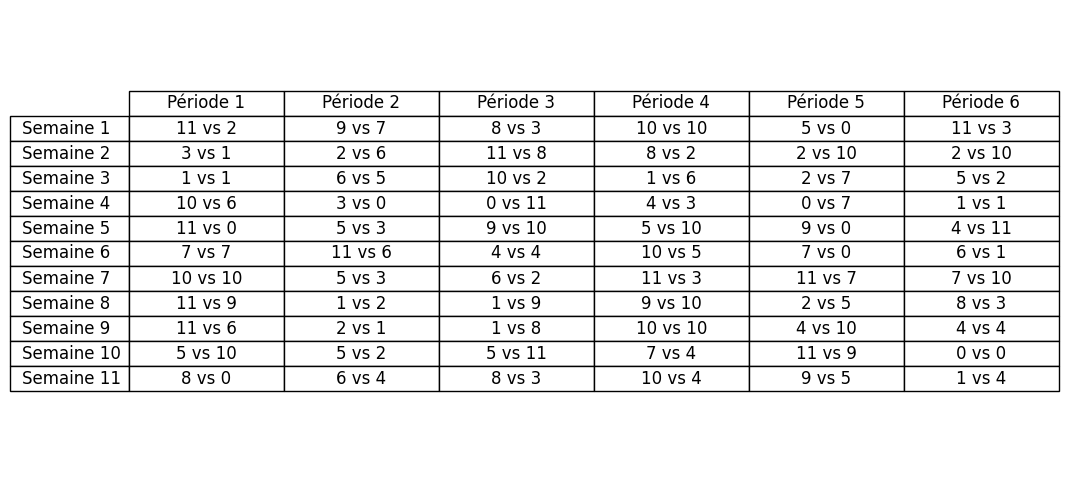

In [5]:
    # random
    scheduleRandom = random_schedule.random_round_robin_schedule(num_teams)
    penaltyRandom = fitness.evaluate_schedule(scheduleRandom, num_teams, False)
    print("\n")
    mean_score('random', it=200)
    print(f"Exemple de planification pour un random : Score de la planification (pénalités totales): {penaltyRandom}")
    print_schedule(scheduleRandom)



Calcul de la moyenne pour local_search_random sur 50 itérations avec 12 équipes
Temps moyen d'exécution pour local_search_random: 1.26246 secondes
Score moyen de fitness pour local_search_random: 122.10000
Score maximal de fitness pour local_search_random: 175.00000
Score minimal de fitness pour local_search_random: 75.00000


Exemple de planification pour la recherche locale a partir d'un random : Score de la planification (pénalités totales): 125


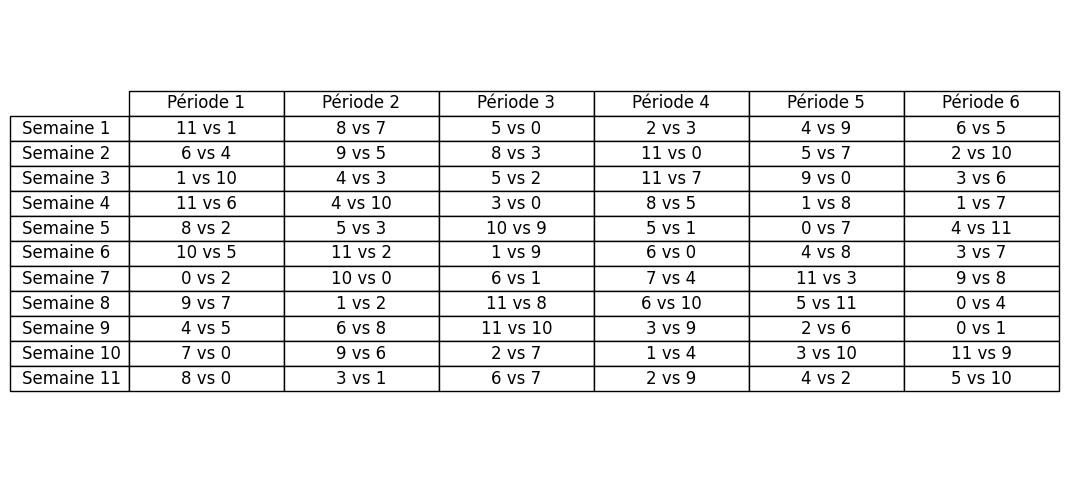

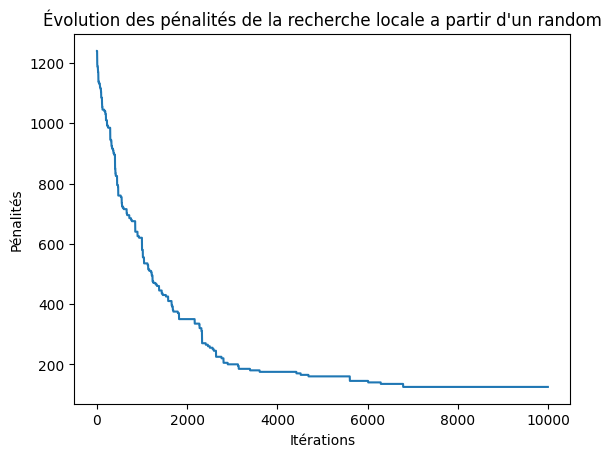

In [6]:
    # recherche locale
    scheduleLocal, penaltyLocal, penalty_history = local_search_descente.local_search(scheduleRandom, num_teams, max_iterations=10000, verbose=False)
    print("\n")
    tableau_recap.append(mean_score('local_search_random', it=50))
    print(f"Exemple de planification pour la recherche locale a partir d'un random : Score de la planification (pénalités totales): {penaltyLocal}")
    print_schedule(scheduleLocal)
    # Pour tracer les pénalités
    iterations = [entry[0] for entry in penalty_history]
    penalties = [entry[1] for entry in penalty_history]
    
    plt.plot(iterations, penalties)
    plt.xlabel('Itérations')
    plt.ylabel('Pénalités')
    plt.title('Évolution des pénalités de la recherche locale a partir d\'un random')
    plt.show()



Calcul de la moyenne pour local_search_glouton sur 50 itérations avec 12 équipes
Temps moyen d'exécution pour local_search_glouton: 1.22209 secondes
Score moyen de fitness pour local_search_glouton: 122.00000
Score maximal de fitness pour local_search_glouton: 190.00000
Score minimal de fitness pour local_search_glouton: 55.00000


Exemple de planification pour la recherche locale a partir d'un glouton : Score de la planification (pénalités totales): 105


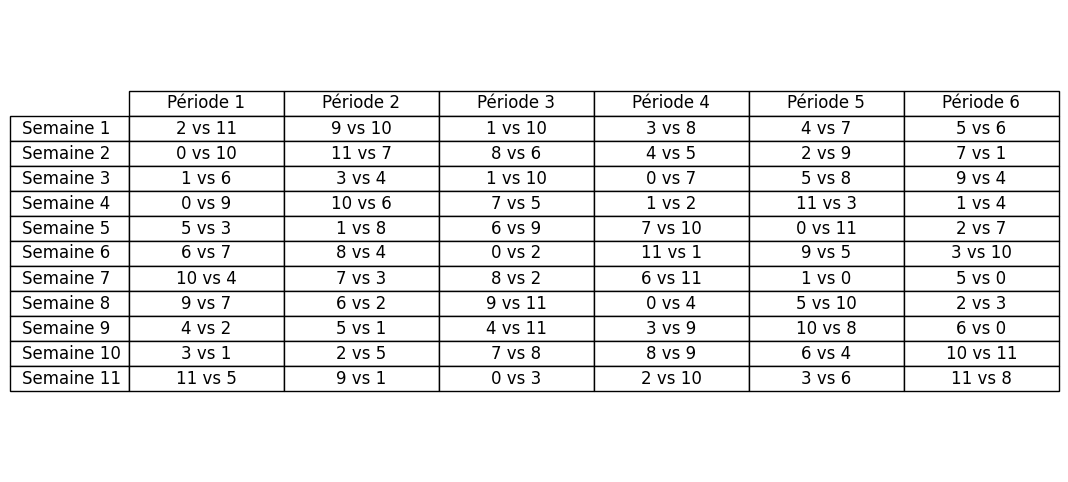

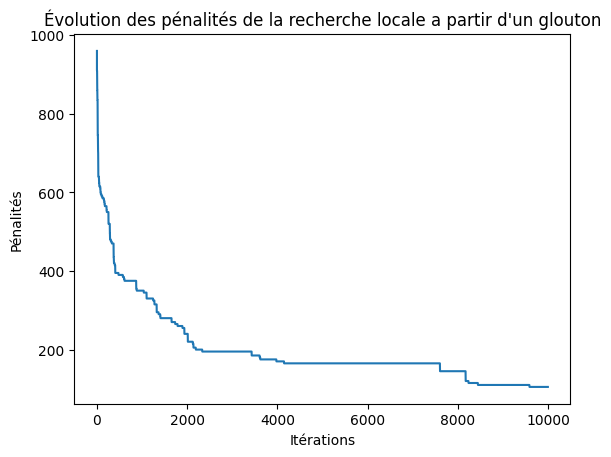

In [7]:
    scheduleLocal, penaltyLocal, penalty_history = local_search_descente.local_search(scheduleGlouton, num_teams, max_iterations=10000, verbose=False)
    print("\n")
    tableau_recap.append(mean_score('local_search_glouton', it=50))
    print(f"Exemple de planification pour la recherche locale a partir d'un glouton : Score de la planification (pénalités totales): {penaltyLocal}")
    print_schedule(scheduleLocal)
    iterations = [entry[0] for entry in penalty_history]
    penalties = [entry[1] for entry in penalty_history]
    
    plt.plot(iterations, penalties)
    plt.xlabel('Itérations')
    plt.ylabel('Pénalités')
    plt.title('Évolution des pénalités de la recherche locale a partir d\'un glouton')
    plt.show()



Calcul de la moyenne pour simulated_annealing_random sur 30 itérations avec 12 équipes
Temps moyen d'exécution pour simulated_annealing_random: 1.44059 secondes
Score moyen de fitness pour simulated_annealing_random: 155.16667
Score maximal de fitness pour simulated_annealing_random: 325.00000
Score minimal de fitness pour simulated_annealing_random: 45.00000
Meilleurs paramètres - Température initiale: 256.59, Taux de refroidissement: 0.93


Exemple de planification pour le recuit simulé a partir d'un random : Score de la planification (pénalités totales): 40


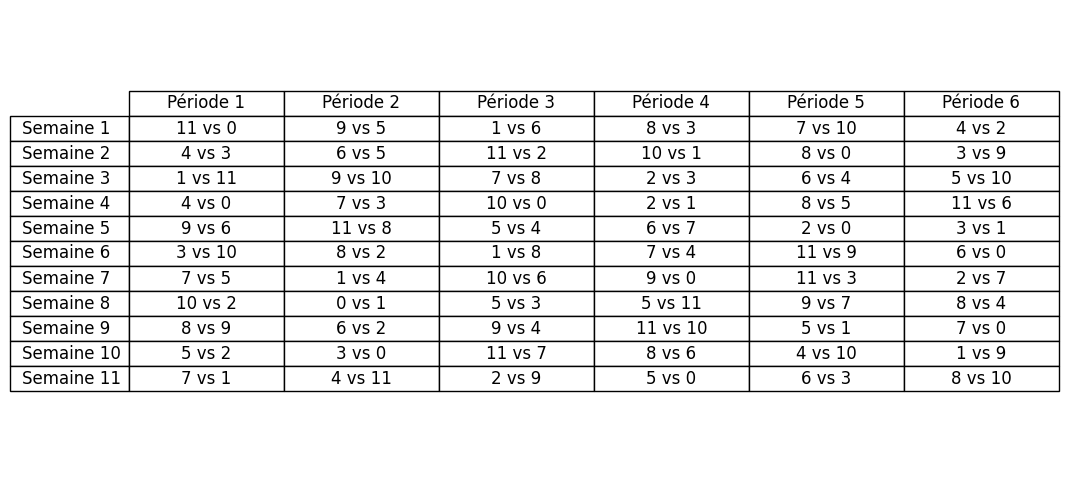

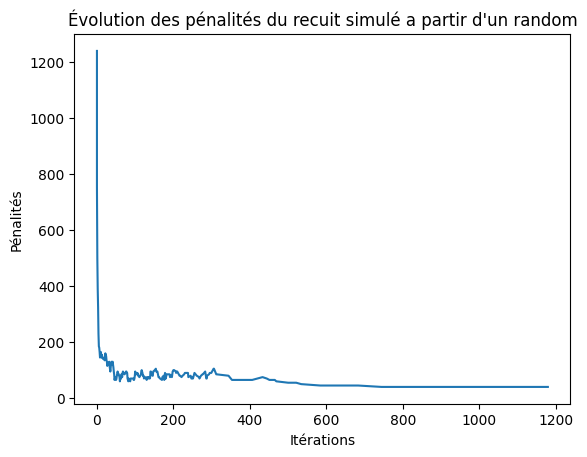

In [8]:
    # Recuit simulé
    scheduleSimulatedAnnealing, penaltySimulatedAnnealing, penalty_history = simulated_annealing.simulated_annealing(scheduleRandom, num_teams, max_iterations=20000, initial_temp=200, cooling_rate=0.99, verbose=False)
    print("\n")
    tableau_recap.append(mean_score('simulated_annealing_random', it=30))
    print(f"Exemple de planification pour le recuit simulé a partir d'un random : Score de la planification (pénalités totales): {penaltySimulatedAnnealing}")
    print_schedule(scheduleSimulatedAnnealing)
    iterations = [entry[0] for entry in penalty_history]
    penalties = [entry[1] for entry in penalty_history]
    
    plt.plot(iterations, penalties)
    plt.xlabel('Itérations')
    plt.ylabel('Pénalités')
    plt.title('Évolution des pénalités du recuit simulé a partir d\'un random')
    plt.show()



Calcul de la moyenne pour simulated_annealing_glouton sur 30 itérations avec 12 équipes
Temps moyen d'exécution pour simulated_annealing_glouton: 1.59383 secondes
Score moyen de fitness pour simulated_annealing_glouton: 138.66667
Score maximal de fitness pour simulated_annealing_glouton: 250.00000
Score minimal de fitness pour simulated_annealing_glouton: 45.00000
Meilleurs paramètres - Température initiale: 167.48, Taux de refroidissement: 0.99


Exemple de planification pour le recuit simulé a partir d'un glouton : Score de la planification (pénalités totales): 45


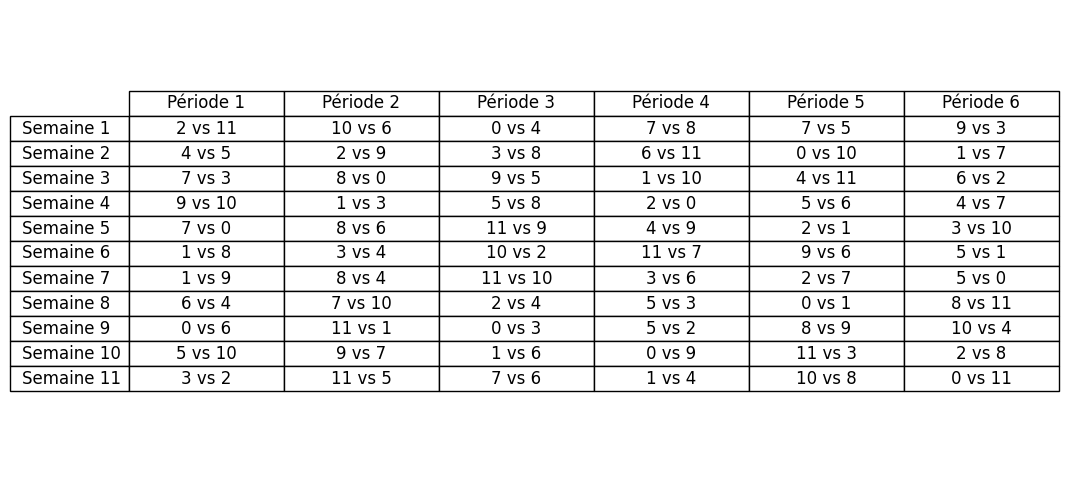

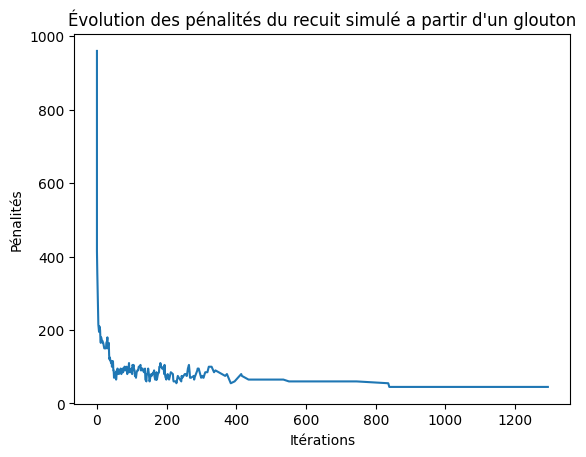

In [9]:
    # Recuit simulé
    scheduleSimulatedAnnealing, penaltySimulatedAnnealing, penalty_history = simulated_annealing.simulated_annealing(scheduleGlouton, num_teams, max_iterations=20000, initial_temp=200, cooling_rate=0.99, verbose=False)
    print("\n")
    tableau_recap.append(mean_score('simulated_annealing_glouton', it=30))
    print(f"Exemple de planification pour le recuit simulé a partir d'un glouton : Score de la planification (pénalités totales): {penaltySimulatedAnnealing}")
    print_schedule(scheduleSimulatedAnnealing)
    iterations = [entry[0] for entry in penalty_history]
    penalties = [entry[1] for entry in penalty_history]
    
    plt.plot(iterations, penalties)
    plt.xlabel('Itérations')
    plt.ylabel('Pénalités')
    plt.title('Évolution des pénalités du recuit simulé a partir d\'un glouton')
    plt.show()



Calcul de la moyenne pour tabou sur 50 itérations avec 12 équipes
Temps moyen d'exécution pour tabou: 3.80696 secondes
Score moyen de fitness pour tabou: 77.10000
Score maximal de fitness pour tabou: 145.00000
Score minimal de fitness pour tabou: 35.00000


Exemple de planification pour la recherche tabou a partir d'un random : Score de la planification (pénalités totales): 85


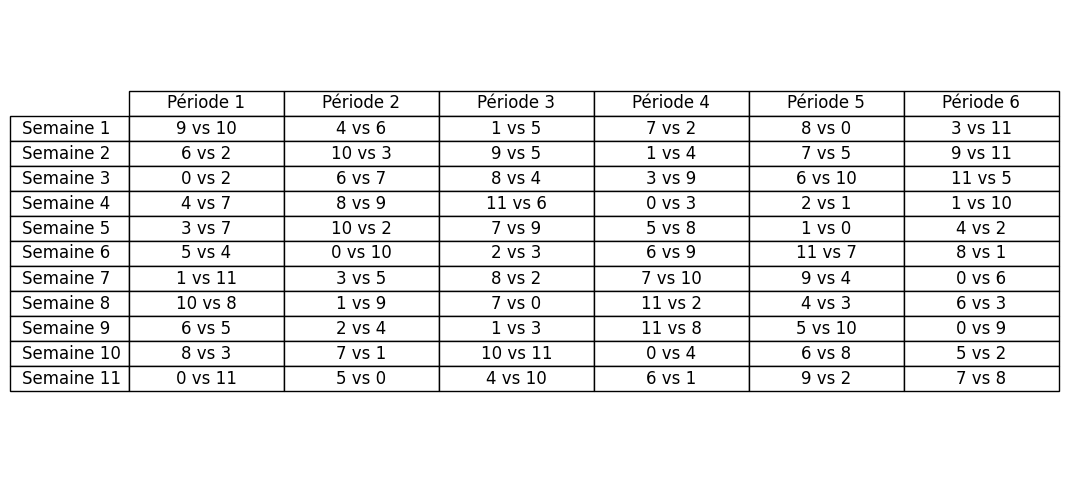

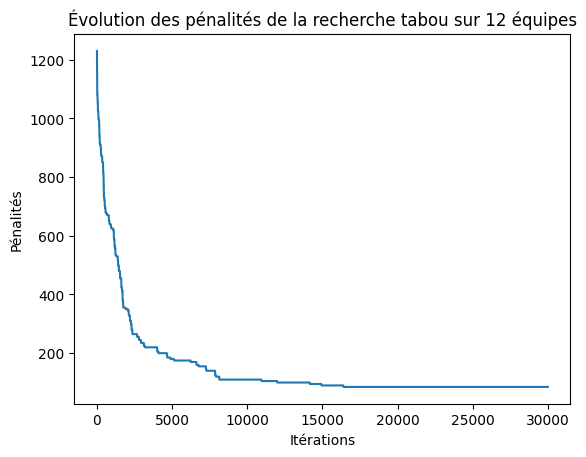

In [10]:
# tabou
import tabou
scheduleRandom = random_schedule.random_round_robin_schedule(num_teams)
scheduleTabou, penaltyTabou, penalty_history = tabou.tabou_search(scheduleRandom, num_teams, max_iterations=30000, verbose=False)
print("\n")

tableau_recap.append(mean_score('tabou', it=50))
print(f"Exemple de planification pour la recherche tabou a partir d'un random : Score de la planification (pénalités totales): {penaltyTabou}")
print_schedule(scheduleTabou)
iterations = [entry[0] for entry in penalty_history]
penalties = [entry[1] for entry in penalty_history]

plt.plot(iterations, penalties)
plt.xlabel('Itérations')
plt.ylabel('Pénalités')
plt.title('Évolution des pénalités de la recherche tabou sur ' + str(num_teams) + ' équipes')
plt.show() 

Meilleure planification trouvée par l'algorithme génétique simple: Score de la planification (pénalités totales): 170 sur un essai


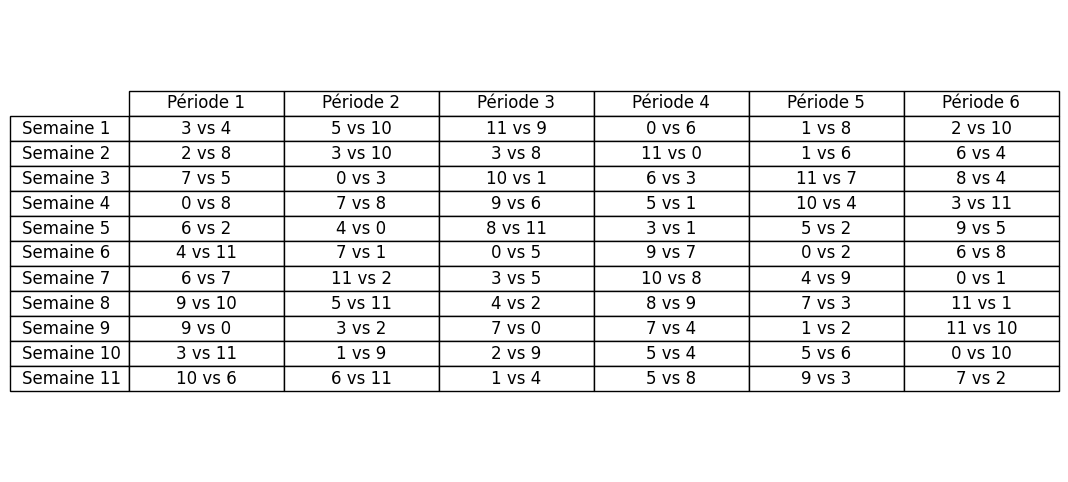

Calcul de la moyenne pour genetic_algorithm_simple sur 30 itérations avec 12 équipes
Temps moyen d'exécution pour genetic_algorithm_simple: 1.13226 secondes
Score moyen de fitness pour genetic_algorithm_simple: 439.33333
Score maximal de fitness pour genetic_algorithm_simple: 520.00000
Score minimal de fitness pour genetic_algorithm_simple: 335.00000




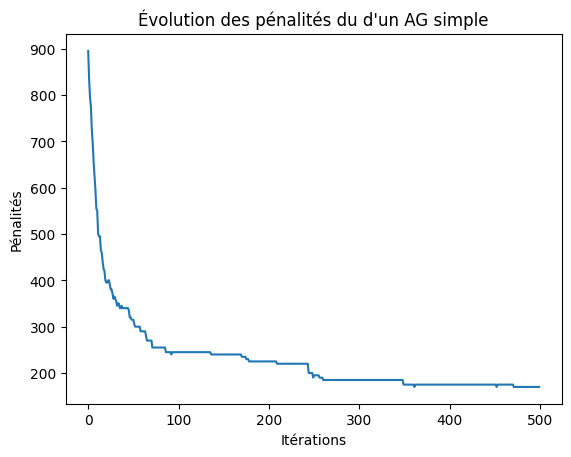

In [11]:
# Example parameters
pop_size = 100  # Size of the population
max_generations = 500  # Number of generations to run

# Run the genetic algorithm
best_schedule, best_penalty, penalty_history = AGSimple.genetic_algorithm(pop_size, num_teams, max_generations)

# Print the best schedule found
print(f"Meilleure planification trouvée par l'algorithme génétique simple: Score de la planification (pénalités totales): {best_penalty} sur un essai")
print_schedule(best_schedule)

tableau_recap.append(mean_score('genetic_algorithm_simple', it=30))
#plot the penalties
iterations = [entry[0] for entry in penalty_history]
penalties = [entry[1] for entry in penalty_history]
    
plt.plot(iterations, penalties)
plt.xlabel('Itérations')
plt.ylabel('Pénalités')
plt.title('Évolution des pénalités du d\'un AG simple')
plt.show()


Meilleure planification trouvée par l'algorithme génétique local search: Score de la planification (pénalités totales): 60 sur un essai


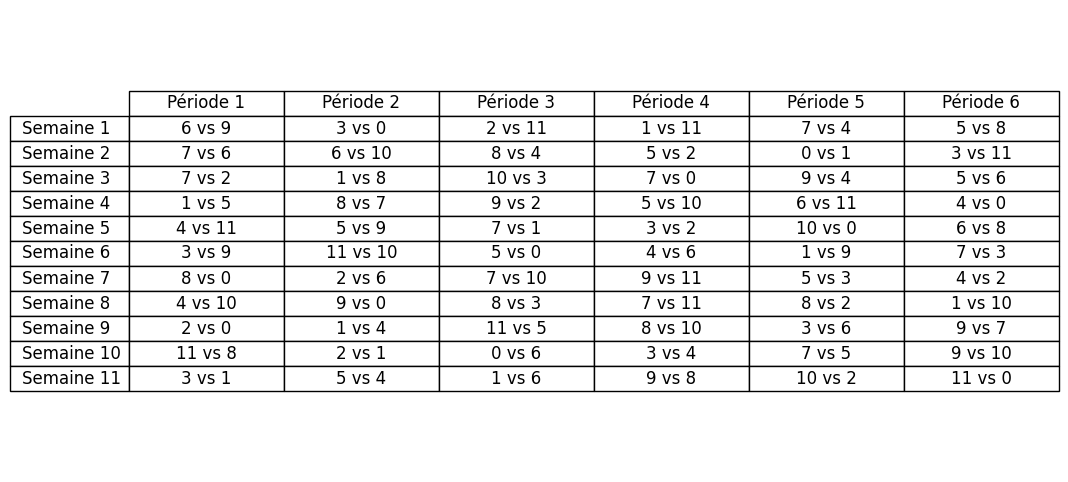

iteration :  0  terminée avec un score de :  35
iteration :  1  terminée avec un score de :  55
iteration :  2  terminée avec un score de :  35
iteration :  3  terminée avec un score de :  60
iteration :  4  terminée avec un score de :  40
Calcul de la moyenne pour genetic_algorithm_local_search sur 5 itérations avec 12 équipes
Temps moyen d'exécution pour genetic_algorithm_local_search: 192.18080 secondes
Score moyen de fitness pour genetic_algorithm_local_search: 45.00000
Score maximal de fitness pour genetic_algorithm_local_search: 60.00000
Score minimal de fitness pour genetic_algorithm_local_search: 35.00000




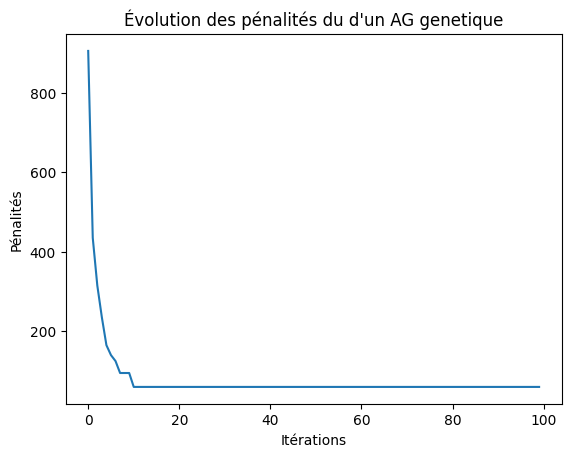

In [12]:
# Example parameters
pop_size = 100  # Size of the population
max_generations = 100  # Number of generations to run

# Run the genetic algorithm
best_schedule, best_penalty, penalty_history = AGlocalsearch.genetic_algorithm(pop_size, num_teams, max_generations)

# Print the best schedule found
print(f"Meilleure planification trouvée par l'algorithme génétique local search: Score de la planification (pénalités totales): {best_penalty} sur un essai")
print_schedule(best_schedule)


tableau_recap.append(mean_score('genetic_algorithm_local_search', it=5))

#plot the penalties
iterations = [entry[0] for entry in penalty_history]
penalties = [entry[1] for entry in penalty_history]
    
plt.plot(iterations, penalties)
plt.xlabel('Itérations')
plt.ylabel('Pénalités')
plt.title('Évolution des pénalités du d\'un AG genetique')
plt.show()

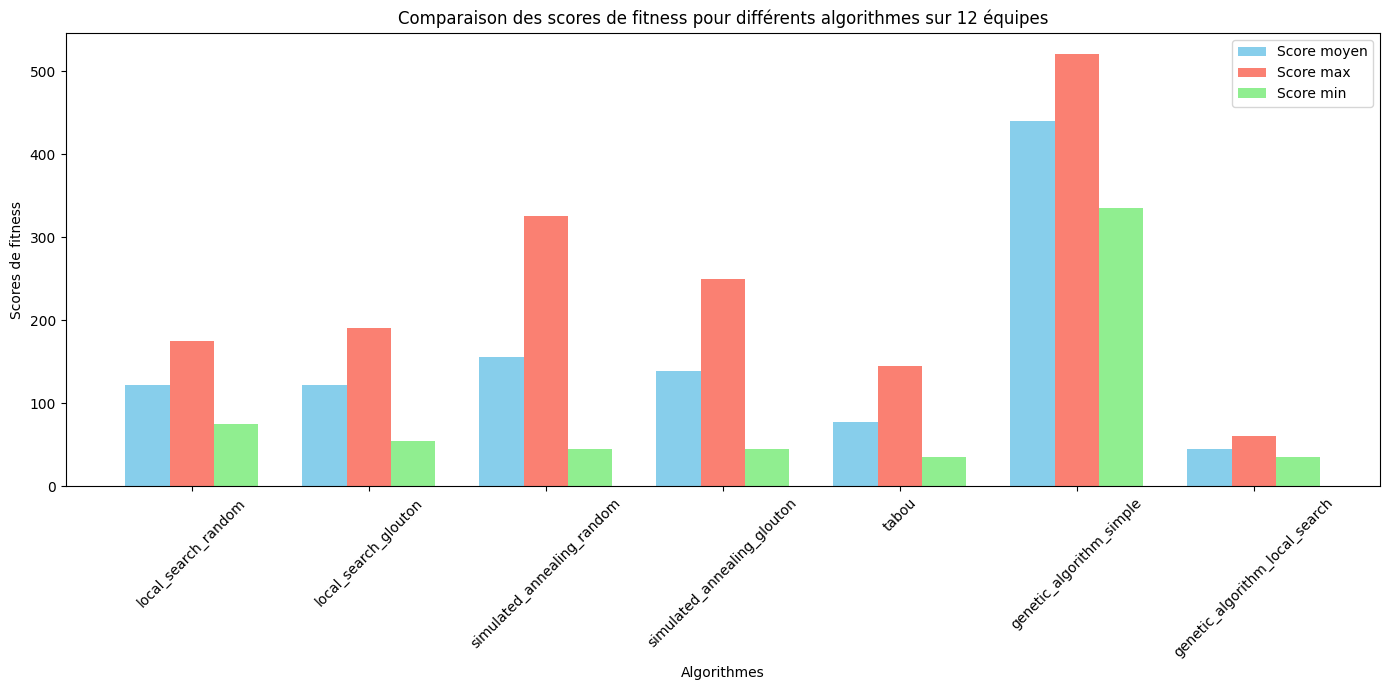

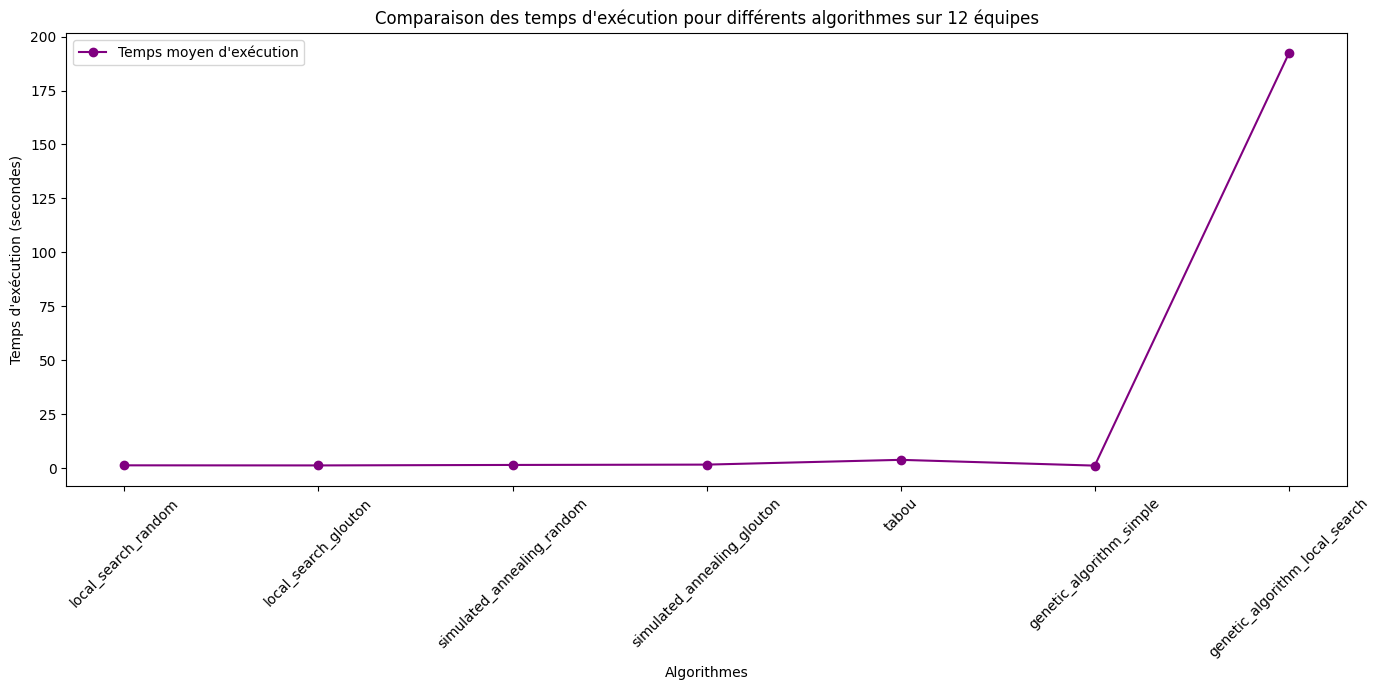

In [13]:
mean_scores = [entry[1] for entry in tableau_recap]
max_scores = [entry[2] for entry in tableau_recap]
min_scores = [entry[3] for entry in tableau_recap]
algos = [entry[0] for entry in tableau_recap]

# Création des indices pour l'axe X
x = np.arange(len(algos))
width = 0.25  # Largeur des barres

# Création de la figure
fig, ax = plt.subplots(figsize=(14, 7))

# Ajout des barres pour les scores de fitness
ax.bar(x - width, mean_scores, width, label='Score moyen', color='skyblue')
ax.bar(x, max_scores, width, label='Score max', color='salmon')
ax.bar(x + width, min_scores, width, label='Score min', color='lightgreen')

# Labels et titre
ax.set_xlabel('Algorithmes')
ax.set_ylabel('Scores de fitness')
ax.set_title("Comparaison des scores de fitness pour différents algorithmes sur " + str(num_teams) + " équipes")
ax.set_xticks(x)
ax.set_xticklabels(algos, rotation=45)
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()

# Afficher le temps dans un graphique avec une courbe
time_table = [entry[4] for entry in tableau_recap]

# Création de la figure
fig, ax = plt.subplots(figsize=(14, 7))

# Ajout de la courbe pour les temps d'exécution
ax.plot(algos, time_table, marker='o', color='purple', label='Temps moyen d\'exécution')

# Labels et titre
ax.set_xlabel('Algorithmes')
ax.set_ylabel('Temps d\'exécution (secondes)')
ax.set_title("Comparaison des temps d'exécution pour différents algorithmes sur " + str(num_teams) + " équipes")
ax.legend()

ax.set_xticks(x)
ax.set_xticklabels(algos, rotation=45)

# Affichage du graphique
plt.tight_layout()
plt.show()